In [17]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))


In [8]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(.1).minimize(cost)

In [23]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost = 2.510573903
learning finished
Accuracy:  0.7608
Label:  [1]
Prediction:  [1]


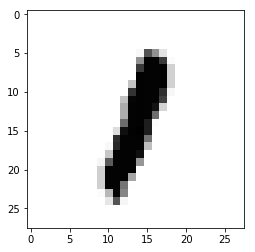

Epoch: 0002 cost = 1.050222280
learning finished
Accuracy:  0.8166
Label:  [6]
Prediction:  [6]


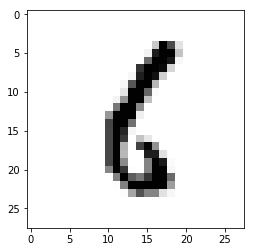

Epoch: 0003 cost = 0.851678358
learning finished
Accuracy:  0.8408
Label:  [0]
Prediction:  [0]


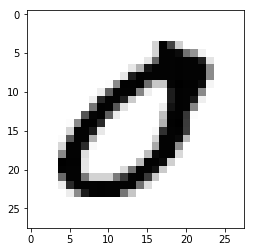

Epoch: 0004 cost = 0.751224836
learning finished
Accuracy:  0.8553
Label:  [5]
Prediction:  [5]


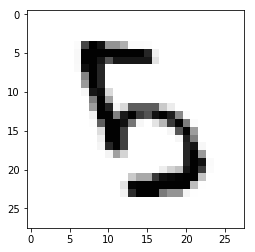

Epoch: 0005 cost = 0.682968166
learning finished
Accuracy:  0.8612
Label:  [8]
Prediction:  [9]


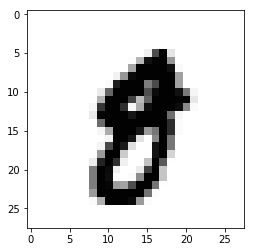

Epoch: 0006 cost = 0.637065046
learning finished
Accuracy:  0.8665
Label:  [0]
Prediction:  [0]


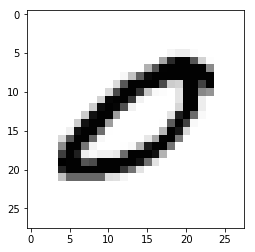

Epoch: 0007 cost = 0.600948254
learning finished
Accuracy:  0.8705
Label:  [3]
Prediction:  [3]


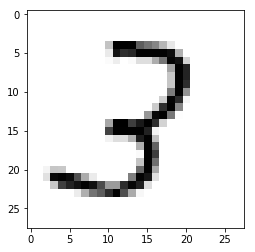

Epoch: 0008 cost = 0.572517376
learning finished
Accuracy:  0.8763
Label:  [6]
Prediction:  [6]


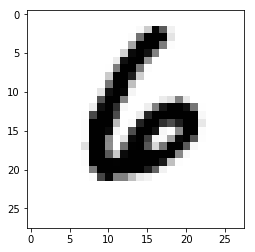

Epoch: 0009 cost = 0.549091571
learning finished
Accuracy:  0.8789
Label:  [9]
Prediction:  [9]


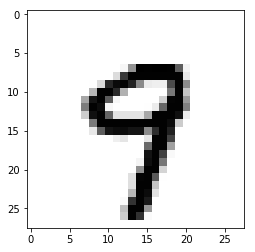

Epoch: 0010 cost = 0.529509330
learning finished
Accuracy:  0.8809
Label:  [8]
Prediction:  [8]


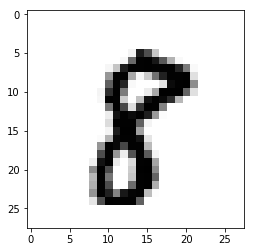

Epoch: 0011 cost = 0.512801633
learning finished
Accuracy:  0.8819
Label:  [3]
Prediction:  [3]


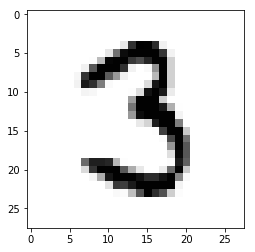

Epoch: 0012 cost = 0.499087473
learning finished
Accuracy:  0.8857
Label:  [0]
Prediction:  [0]


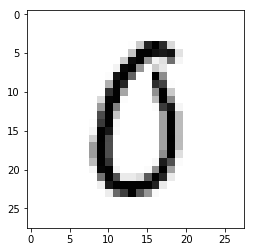

Epoch: 0013 cost = 0.486143726
learning finished
Accuracy:  0.8867
Label:  [3]
Prediction:  [3]


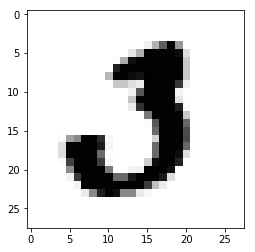

Epoch: 0014 cost = 0.474170262
learning finished
Accuracy:  0.8861
Label:  [4]
Prediction:  [4]


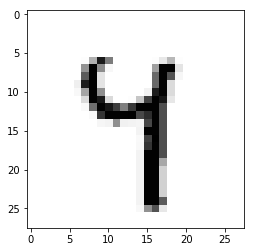

Epoch: 0015 cost = 0.464562879
learning finished
Accuracy:  0.8899
Label:  [7]
Prediction:  [7]


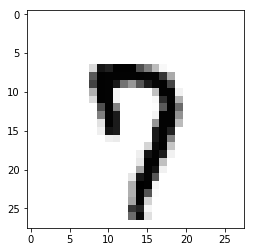

Epoch: 0016 cost = 0.456118538
learning finished
Accuracy:  0.8911
Label:  [2]
Prediction:  [2]


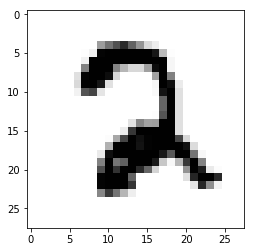

Epoch: 0017 cost = 0.447204294
learning finished
Accuracy:  0.8903
Label:  [8]
Prediction:  [8]


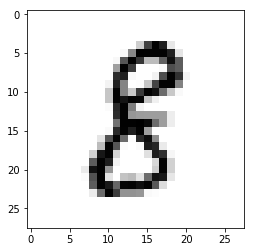

Epoch: 0018 cost = 0.439509809
learning finished
Accuracy:  0.8935
Label:  [4]
Prediction:  [4]


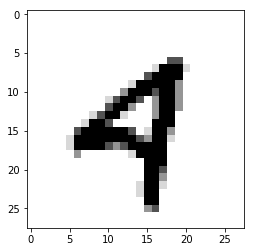

Epoch: 0019 cost = 0.432087806
learning finished
Accuracy:  0.8936
Label:  [7]
Prediction:  [7]


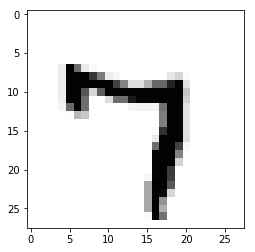

Epoch: 0020 cost = 0.425412417
learning finished
Accuracy:  0.8952
Label:  [5]
Prediction:  [5]


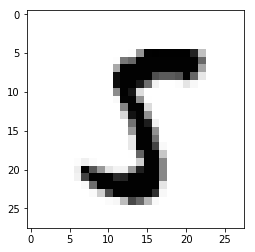

Epoch: 0021 cost = 0.419930187
learning finished
Accuracy:  0.8969
Label:  [5]
Prediction:  [5]


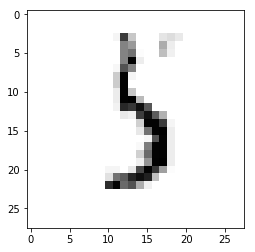

Epoch: 0022 cost = 0.413720438
learning finished
Accuracy:  0.8974
Label:  [7]
Prediction:  [7]


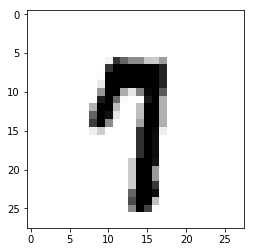

Epoch: 0023 cost = 0.409210535
learning finished
Accuracy:  0.8981
Label:  [7]
Prediction:  [7]


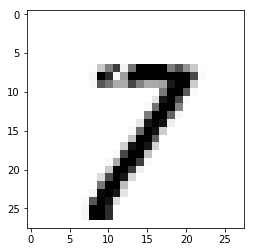

Epoch: 0024 cost = 0.403029663
learning finished
Accuracy:  0.8977
Label:  [0]
Prediction:  [0]


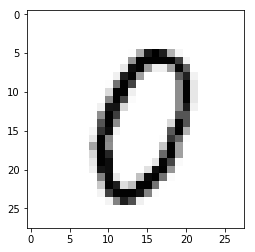

Epoch: 0025 cost = 0.399198533
learning finished
Accuracy:  0.897
Label:  [7]
Prediction:  [7]


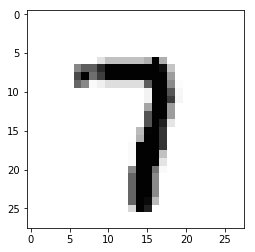

Epoch: 0026 cost = 0.394837038
learning finished
Accuracy:  0.897
Label:  [8]
Prediction:  [8]


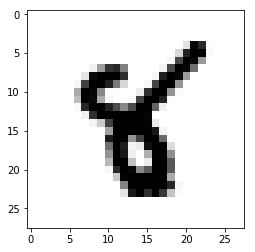

Epoch: 0027 cost = 0.390185100
learning finished
Accuracy:  0.8996
Label:  [9]
Prediction:  [9]


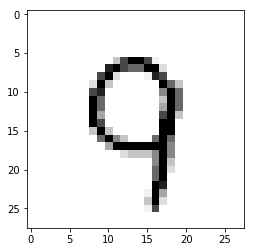

Epoch: 0028 cost = 0.385629519
learning finished
Accuracy:  0.9008
Label:  [1]
Prediction:  [1]


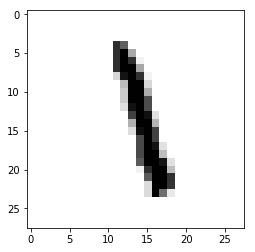

Epoch: 0029 cost = 0.382409059
learning finished
Accuracy:  0.902
Label:  [2]
Prediction:  [2]


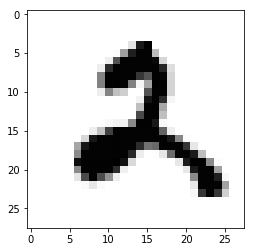

Epoch: 0030 cost = 0.378801129
learning finished
Accuracy:  0.9019
Label:  [1]
Prediction:  [1]


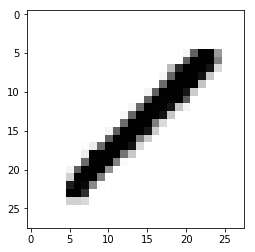

In [24]:
training_epochs = 30
batch_size = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    total_batch = int(mnist.train.num_examples / batch_size)
    for epoch in range(training_epochs):        
        avg_cost = 0        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
        
        print('Epoch:', '%04d' % (epoch + 1),
                  'cost =', '{:.9f}'.format(avg_cost))
        
        print('learning finished')
        
        # testing the model using thest sets
        print("Accuracy: ", accuracy.eval(session=sess, 
                        feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
        
        # Get one and predict        
        r = np.random.randint(0, mnist.test.num_examples - 1)
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction: ", sess.run(
            tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

        plt.imshow(
            mnist.test.images[r:r + 1].reshape(28, 28),
            cmap='Greys',
            interpolation='nearest')
        plt.show()
            